# Use CDO to Compare Model and Observation Data


In this notebook we demostrate how to compare model and observation data:

- Look at the data contained in our example file
- Concatenate multiple files
- Data remapping
- Compare model and observation data 

This example uses the Coupled Model Intercomparison Project (CMIP6) collections.(http://dx.doi.org/10.25914/5b98afc88531e).

---
inspired by the notebook in  https://github.com/NCI-data-analysis-platform/climate-cmip.git
- Authors: NCI Virtual Research Environment Team
- Keywords: CMIP, CDO, concatenate data, data remapping
- Create Date: 2019-Oct; Update Date: 2021-Feb
---
Adapted to DKRZ env: S. Kindermann, August 2022

This notebook is licenced under the [Creative Commons Attribution 4.0 International license](https://creativecommons.org/licenses/by/4.0/)


### Load CDO module

To load the CDO module on the VDI, run:

``` $ module load cdo```

### Check our data

Let's look at the near surface temperature from the 20th century all-forcing historical simulation based on the CESM2.0 model of NCAR:

In [1]:
!ls /pool/data/CMIP6/data/CMIP/NCAR/CESM2/historical/r1i1p1f1/Amon/tas/gn/v20190308/tas_Amon_CESM2_historical_r1i1p1f1_gn_185001-201412.nc

/pool/data/CMIP6/data/CMIP/NCAR/CESM2/historical/r1i1p1f1/Amon/tas/gn/v20190308/tas_Amon_CESM2_historical_r1i1p1f1_gn_185001-201412.nc


### Have a look at the data file using cdo info

**Basic usage:**  
```
cdo info <filename> | less
```
**less** display only one page at a time in the termial. You can move forwards and backwards to see more. Press **q** to quit the view.

### Let's see which years this file includes

We use the function `showyear` to display all the years in this file:

In [2]:
!cdo showyear /pool/data/CMIP6/data/CMIP/NCAR/CESM2/historical/r1i1p1f1/Amon/tas/gn/v20190308/tas_Amon_CESM2_historical_r1i1p1f1_gn_185001-201412.nc

 1850 1851 1852 1853 1854 1855 1856 1857 1858 1859 1860 1861 1862 1863 1864 1865 1866 1867 1868 1869
 1870 1871 1872 1873 1874 1875 1876 1877 1878 1879 1880 1881 1882 1883 1884 1885 1886 1887 1888 1889
 1890 1891 1892 1893 1894 1895 1896 1897 1898 1899 1900 1901 1902 1903 1904 1905 1906 1907 1908 1909
 1910 1911 1912 1913 1914 1915 1916 1917 1918 1919 1920 1921 1922 1923 1924 1925 1926 1927 1928 1929
 1930 1931 1932 1933 1934 1935 1936 1937 1938 1939 1940 1941 1942 1943 1944 1945 1946 1947 1948 1949
 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969
 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989
 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009
 2010 2011 2012 2013 2014
cdo    showyear: Processed 1 variable over 1980 timesteps [0.28s 50MB].


### Select only 10 years pf data from the original model file

**basic usage**:
```
cdo selyear, stratyear/endyear <input.nc> <output.nc>
```

In [3]:
### create output directory if it doesn't already exist
import os
outdir = './output'
if not os.path.exists(outdir):
    os.mkdir(outdir)

!cdo selyear,1991/2000 /pool/data/CMIP6/data/CMIP/NCAR/CESM2/historical/r1i1p1f1/Amon/tas/gn/v20190308/tas_Amon_CESM2_historical_r1i1p1f1_gn_185001-201412.nc  ./output/tas_Amon_CESM2_historical_r1i1p1f1_gn_199101-200012.nc

cdo    selyear: Processed 6635520 values from 1 variable over 1980 timesteps [0.27s 60MB].


### show the attributes of the data

In [4]:
!cdo showatts ./output/tas_Amon_CESM2_historical_r1i1p1f1_gn_199101-200012.nc 

tas:
   standard_name = "air_temperature"
   long_name = "Near-Surface Air Temperature"
   units = "K"
   missing_value = 1e+20
   cell_measures = "area: areacella"
   cell_methods = "area: time: mean"
   comment = "near-surface (usually, 2 meter) air temperature"
   description = "near-surface (usually, 2 meter) air temperature"
   frequency = "mon"
   id = "tas"
   mipTable = "Amon"
   out_name = "tas"
   prov = "Amon ((isd.003))"
   realm = "atmos"
   time = "time"
   time_label = "time-mean"
   time_title = "Temporal mean"
   title = "Near-Surface Air Temperature"
   type = "real"
   variable_id = "tas"
Global:
   Conventions = "CF-1.7 CMIP-6.2"
   activity_id = "CMIP"
   case_id = "15"
   cesm_casename = "b.e21.BHIST.f09_g17.CMIP6-historical.001"
   contact = "cesm_cmip6@ucar.edu"
   creation_date = "2019-01-16T23:34:05Z"
   data_specs_version = "01.00.29"
   experiment = "all-forcing simulation of the recent past"
   experiment_id = "historical"
   external_variables = "areacella

The unit of Near-Surface Air Temperature is 'K'--Kelvin. We can convert Kelvin to Celsius in order to be consistent with observation data. First we will substract 273.15 from our Near-Surface Air Temperature data values and second, we will need to change the attribution units:

In [5]:
!cdo setattribute,tas@units=degC -subc,273.15 ./output/tas_Amon_CESM2_historical_r1i1p1f1_gn_199101-200012.nc ./output/tas_Amon_CESM2_historical_r1i1p1f1_gn_199101-200012_unitC.nc 

cdo(1) subc: Process started
cdo(1) subc: Processed 6635520 values from 1 variable over 120 timesteps.
cdo    setattribute: Processed 6635520 values from 1 variable over 120 timesteps [0.08s 57MB].


### Find observational temperature data and select year 1991-2000

The observational temperature data used below has been downloaded from the NOAA website: https://psl.noaa.gov/repository/entry/show?entryid=synth:e570c8f9-ec09-4e89-93b4-babd5651e7a9:L3VkZWwuYWlydC5wcmVjaXAvYWlyLm1vbi5tZWFuLnY1MDEubmM=. This file is the monthly mean of surface temperature reanalysis data.

In [6]:
!ls ../../data/air.mon.mean.v501.nc

../../data/air.mon.mean.v501.nc


In [7]:
!cdo selyear,1991/2000 ../../data/air.mon.mean.v501.nc  ./output/air.mon.mean.v501.199101-200012.nc

cdo    selyear: Processed 31104000 values from 1 variable over 1416 timesteps [0.56s 67MB].


### To see the difference between the model data and observation data

**Basic usage:**  
```
cdo sub <input1.nc> <input2.nc> <output.nc> 

```
This operation will substract input2.nc from input1.nc with the results being written to output.nc

In [8]:
!cdo sub ./output/tas_Amon_CESM2_historical_r1i1p1f1_gn_199101-200012.nc ./output/air.mon.mean.v501.199101-200012.nc ./output/CESM2_HADCRU_dif.nc


cdo    sub (Abort): Grid size of the input parameter tas do not match!


Hopever, the operation above runs into the following error:

**cdo sub(Abort): Grid size of the input parameter tas do not match!**

This is because the resolution of the model data is different from that of the observation data. CDO provides several ways of data interpolation, one of which is `cdo remapcon`.

**basic usage:**
```
cdo remapcon, <input1.nc> <input2.nc> <output.nc>
```
Here input1.nc is the file that we want the resolution to be consistent with.
So, let's do remapping first and then subtraction.

In [9]:
!cdo sub -remapcon,./output/air.mon.mean.v501.199101-200012.nc ./output/tas_Amon_CESM2_historical_r1i1p1f1_gn_199101-200012_unitC.nc ./output/air.mon.mean.v501.199101-200012.nc ./output/CESM2_DelawareT_dif.nc

cdo(1) remapcon: Process started
cdo(1) remapcon: YAC first order conservative weights from lonlat (288x192) to lonlat (720x360) grid
cdo(1) remapcon:                        1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8 9 9 9 9 9 9 9 9 9 91cdo(1) remapcon: Processed 6635520 values from 1 variable over 120 timesteps.
cdo    sub: Processed 62208000 values from 2 variables over 240 timesteps [1.79s 104MB].


### Calculate average difference and show it in ncview

In [10]:
!cdo timavg ./output/CESM2_DelawareT_dif.nc ./output/CESM2_DelawareT_dif_avg.nc

cdo    timavg:                        1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8 9 9 9 9 9 9 9 9 9 91cdo    timavg: Processed 31104000 values from 1 variable over 120 timesteps [0.18s 50MB].


In [12]:
!ls ./output/CESM2_DelawareT_dif_avg.nc

./output/CESM2_DelawareT_dif_avg.nc


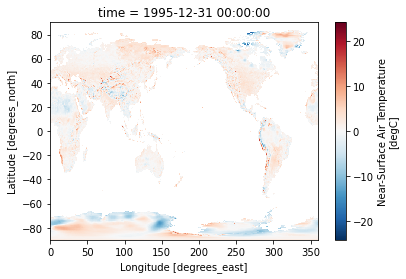

In [13]:
import xarray as xr
file=xr.open_dataset("./output/CESM2_DelawareT_dif_avg.nc")
file.tas.plot()

#!ncview ./output/CESM2_DelawareT_dif_avg.nc

<div class="alert alert-info">
<b>Tip: </b> In CDO, an artificial distinction is made between the notions mean (e.g.timmean) and average (e.g. timavg). The mean is regarded as a statistical function, whereas the average is found simply by adding the sample members and dividing the result by the sample size. For example, the mean of 1, 2, miss and 3 is (1 + 2 + 3)/3 = 2, whereas the average is (1 + 2 + miss + 3)/4. If there are no missing values in the sample, the average and mean are identical.
</div>

![ ](output/cdo_comp3.png)

We can see that in some areas the model simulated temperature is higher than the observation data, whereas other areas are lower than the observation, and the difference seems to be greater at the higher latitude areas.

### Summary

In this example, we show how to use cdo to concatenate data files and remap data in order to change its resolution.

## Reference

https://code.mpimet.mpg.de/projects/cdo/embedded/cdo.pdf
